In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1 import make_axes_locatable
from loader import load_image

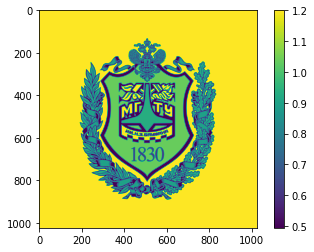

In [15]:
file = 'image/BMSTU 1024x1024.png'
phase = load_image(file) + 0.2
plt.imshow(phase)
plt.colorbar()
plt.show()

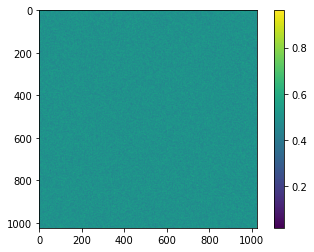

In [16]:
i_amplitude = 0.5
intensity = i_amplitude * np.ones(phase.shape)

mean = 0.0
standard_deviation = 0.1
noise = np.random.normal(mean, standard_deviation, size=intensity.shape)
intensity += noise

plt.imshow(intensity)
plt.colorbar()
plt.show()

In [17]:
complex_field = np.sqrt(intensity) * np.exp(1j * phase)

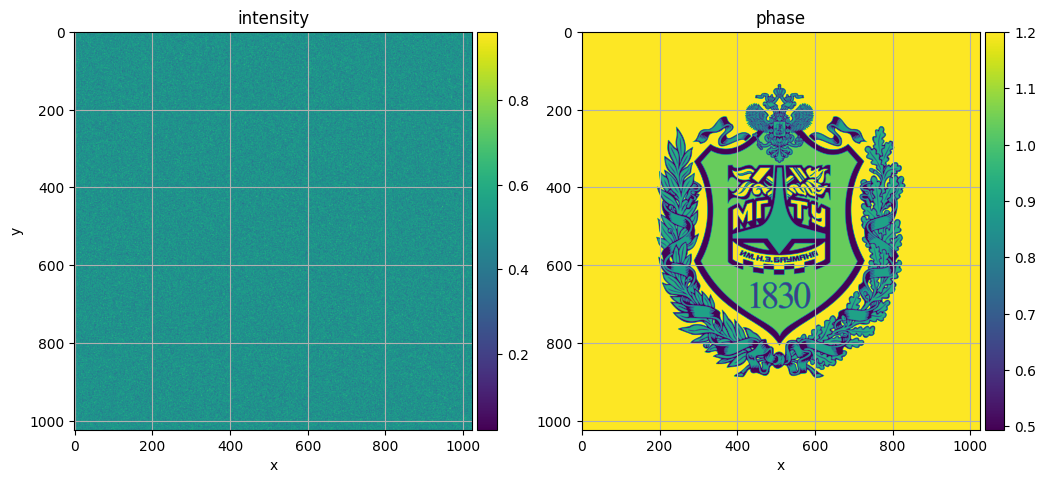

In [18]:
fig = plt.figure(dpi=100, figsize=[12,8])
ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)

intensity = np.abs(complex_field) ** 2

img1 = ax1.imshow(intensity)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar1 = plt.colorbar(img1, cax=cax1)

ax1.grid(True)
ax1.title.set_text('intensity')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

phase = unwrap_phase(np.angle(complex_field))

img2 = ax2.imshow(phase)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(img2, cax=cax2)

ax2.grid(True)
ax2.title.set_text('phase')
ax2.set_xlabel('x')

plt.show()

In [19]:
np.save('fields/bmstu_phase_noise_intensity/BMSTU_phase_big_noise_intensity.npy', complex_field)